## Breast Cancer Detection

### Importing all the dependencies

In [141]:
# Importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle

### Load And Read Dataset

In [142]:
# Import dataset
df = pd.read_csv("Breast_Cancer_Prediction.csv")

In [143]:
#printing the  first 5 rows
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [144]:
#printing the shape of the dataset
df.shape


(569, 33)

## Exploration Data Analysis

In [145]:
#getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [146]:
#statistical measures about the data
df.describe()


id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

### Checking for missing values

In [147]:
#checking for the null values in the datast
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [148]:
#checking the distribution of the target
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [149]:
#checking the distribution of the target
df.groupby('diagnosis').mean()

id  radius_mean  texture_mean  perimeter_mean  \
diagnosis                                                            
B          2.654382e+07    12.146524     17.914762       78.075406   
M          3.681805e+07    17.462830     21.604906      115.365377   

            area_mean  smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                                  
B          462.790196         0.092478          0.080085        0.046058   
M          978.376415         0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  ...  texture_worst  \
diagnosis                                      ...                  
B                     0.025717       0.174186  ...      23.515070   
M                     0.087990       0.192909  ...      29.318208   

           perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
diagnosis                                                                      
B                87.005938   558.899440          0.124959           0.182673   
M               141.370330  1422.286321          0.144845           0.374824   

           concavity_worst  concave points_worst  symmetry_worst  \
diagnosis                                                          
B                 0.166238              0.074444        0.270246   
M                 0.450606              0.182237        0.323468   

           fractal_dimension_worst  Unnamed: 32  
diagnosis                                        
B                         0.079442          NaN  
M                         0.091530          NaN  

[2 rows x 32 columns]

In [150]:
#replace the M and B with 1 and 0
df['diagnosis'] = df['diagnosis'].map({'M':0, 'B':1})



## Multivariate Data Analysis

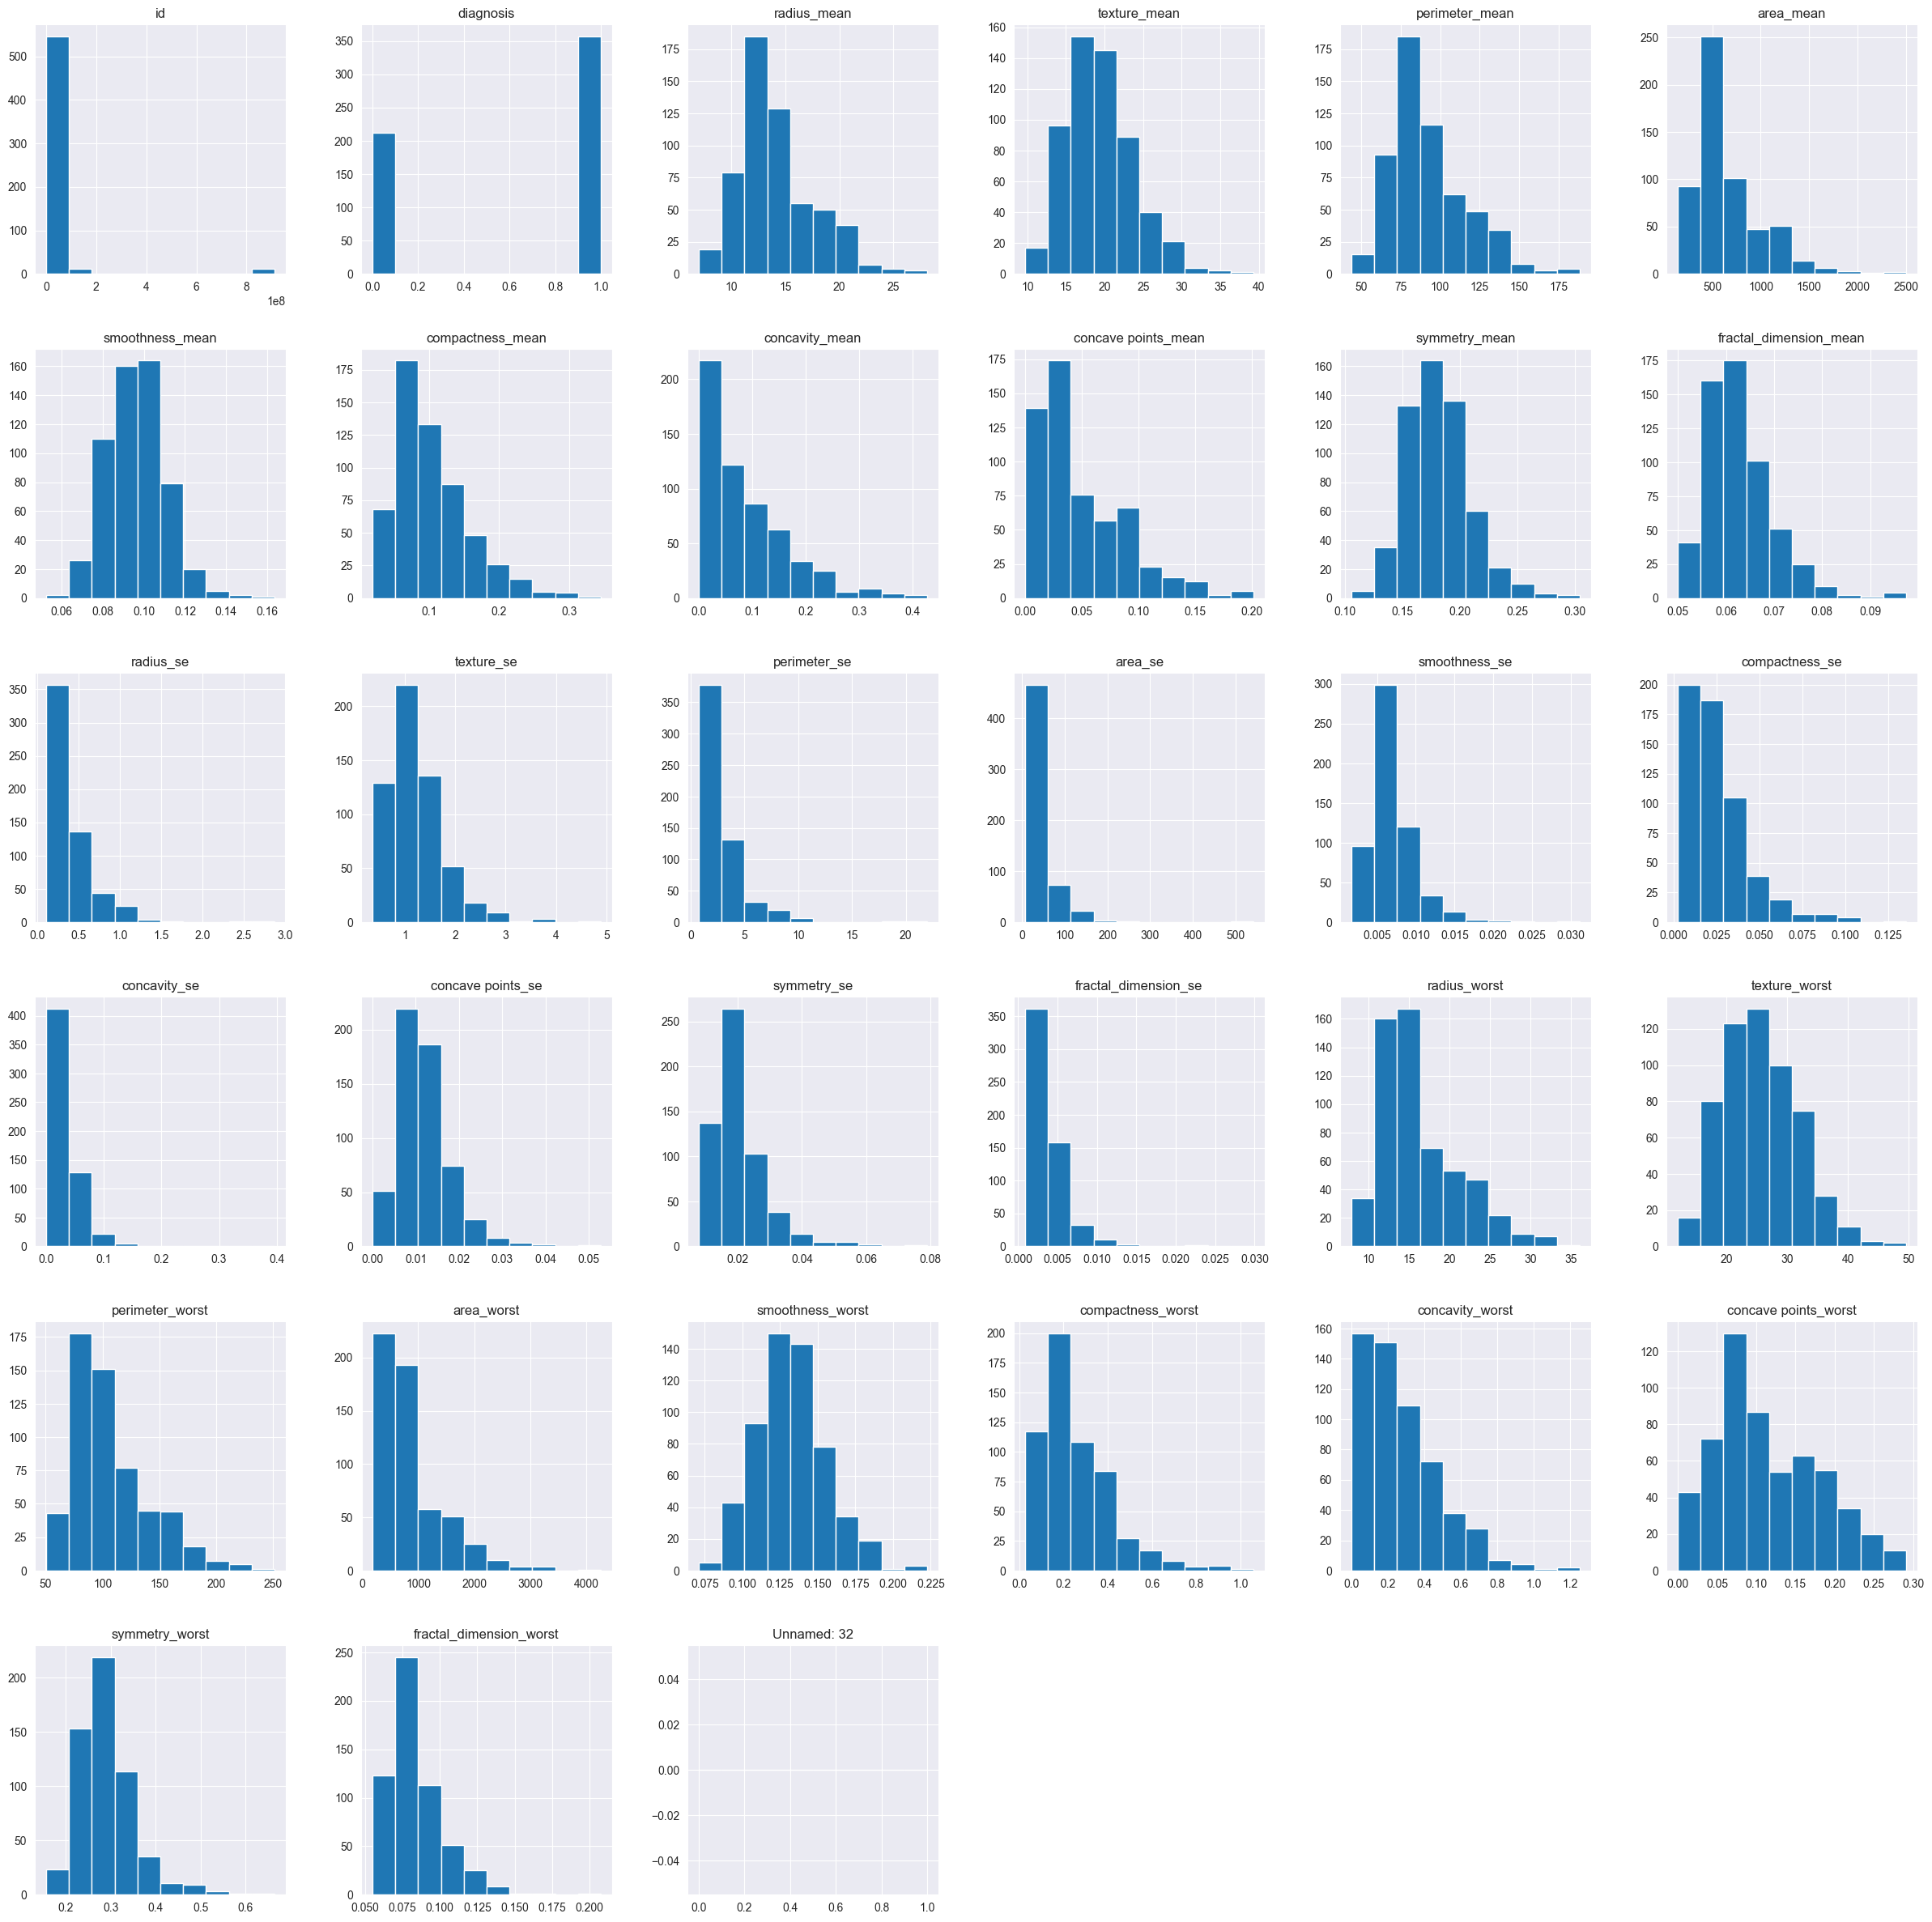

In [151]:
# Plot histograms for each variable
sns.set_style('darkgrid')
df.hist(figsize=(30,30))
plt.show()

## Feature selection

In [152]:
df.corr()

id  diagnosis  radius_mean  texture_mean  \
id                       1.000000  -0.039769     0.074626      0.099770   
diagnosis               -0.039769   1.000000    -0.730029     -0.415185   
radius_mean              0.074626  -0.730029     1.000000      0.323782   
texture_mean             0.099770  -0.415185     0.323782      1.000000   
perimeter_mean           0.073159  -0.742636     0.997855      0.329533   
area_mean                0.096893  -0.708984     0.987357      0.321086   
smoothness_mean         -0.012968  -0.358560     0.170581     -0.023389   
compactness_mean         0.000096  -0.596534     0.506124      0.236702   
concavity_mean           0.050080  -0.696360     0.676764      0.302418   
concave points_mean      0.044158  -0.776614     0.822529      0.293464   
symmetry_mean           -0.022114  -0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511   0.012838    -0.311631     -0.076437   
radius_se                0.143048  -0.567134     0.679090      0.275869   
texture_se              -0.007526   0.008303    -0.097317      0.386358   
perimeter_se             0.137331  -0.556141     0.674172      0.281673   
area_se                  0.177742  -0.548236     0.735864      0.259845   
smoothness_se            0.096781   0.067016    -0.222600      0.006614   
compactness_se           0.033961  -0.292999     0.206000      0.191975   
concavity_se             0.055239  -0.253730     0.194204      0.143293   
concave points_se        0.078768  -0.408042     0.376169      0.163851   
symmetry_se             -0.017306   0.006522    -0.104321      0.009127   
fractal_dimension_se     0.025725  -0.077972    -0.042641      0.054458   
radius_worst             0.082405  -0.776454     0.969539      0.352573   
texture_worst            0.064720  -0.456903     0.297008      0.912045   
perimeter_worst          0.079986  -0.782914     0.965137      0.358040   
area_worst               0.107187  -0.733825     0.941082      0.343546   
smoothness_worst         0.010338  -0.421465     0.119616      0.077503   
compactness_worst       -0.002968  -0.590998     0.413463      0.277830   
concavity_worst          0.023203  -0.659610     0.526911      0.301025   
concave points_worst     0.035174  -0.793566     0.744214      0.295316   
symmetry_worst          -0.044224  -0.416294     0.163953      0.105008   
fractal_dimension_worst -0.029866  -0.323872     0.007066      0.119205   
Unnamed: 32                   NaN        NaN          NaN           NaN   

                         perimeter_mean  area_mean  smoothness_mean  \
id                             0.073159   0.096893        -0.012968   
diagnosis                     -0.742636  -0.708984        -0.358560   
radius_mean                    0.997855   0.987357         0.170581   
texture_mean                   0.329533   0.321086        -0.023389   
perimeter_mean                 1.000000   0.986507         0.207278   
area_mean                      0.986507   1.000000         0.177028   
smoothness_mean                0.207278   0.177028         1.000000   
compactness_mean               0.556936   0.498502         0.659123   
concavity_mean                 0.716136   0.685983         0.521984   
concave points_mean            0.850977   0.823269         0.553695   
symmetry_mean                  0.183027   0.151293         0.557775   
fractal_dimension_mean        -0.261477  -0.283110         0.584792   
radius_se                      0.691765   0.732562         0.301467   
texture_se                    -0.086761  -0.066280         0.068406   
perimeter_se                   0.693135   0.726628         0.296092   
area_se                        0.744983   0.800086         0.246552   
smoothness_se                 -0.202694  -0.166777         0.332375   
compactness_se                 0.250744   0.212583         0.318943   
concavity_se                   0.228082   0.207660         0.248396   
concave points_se              0.407217   0.372320         0

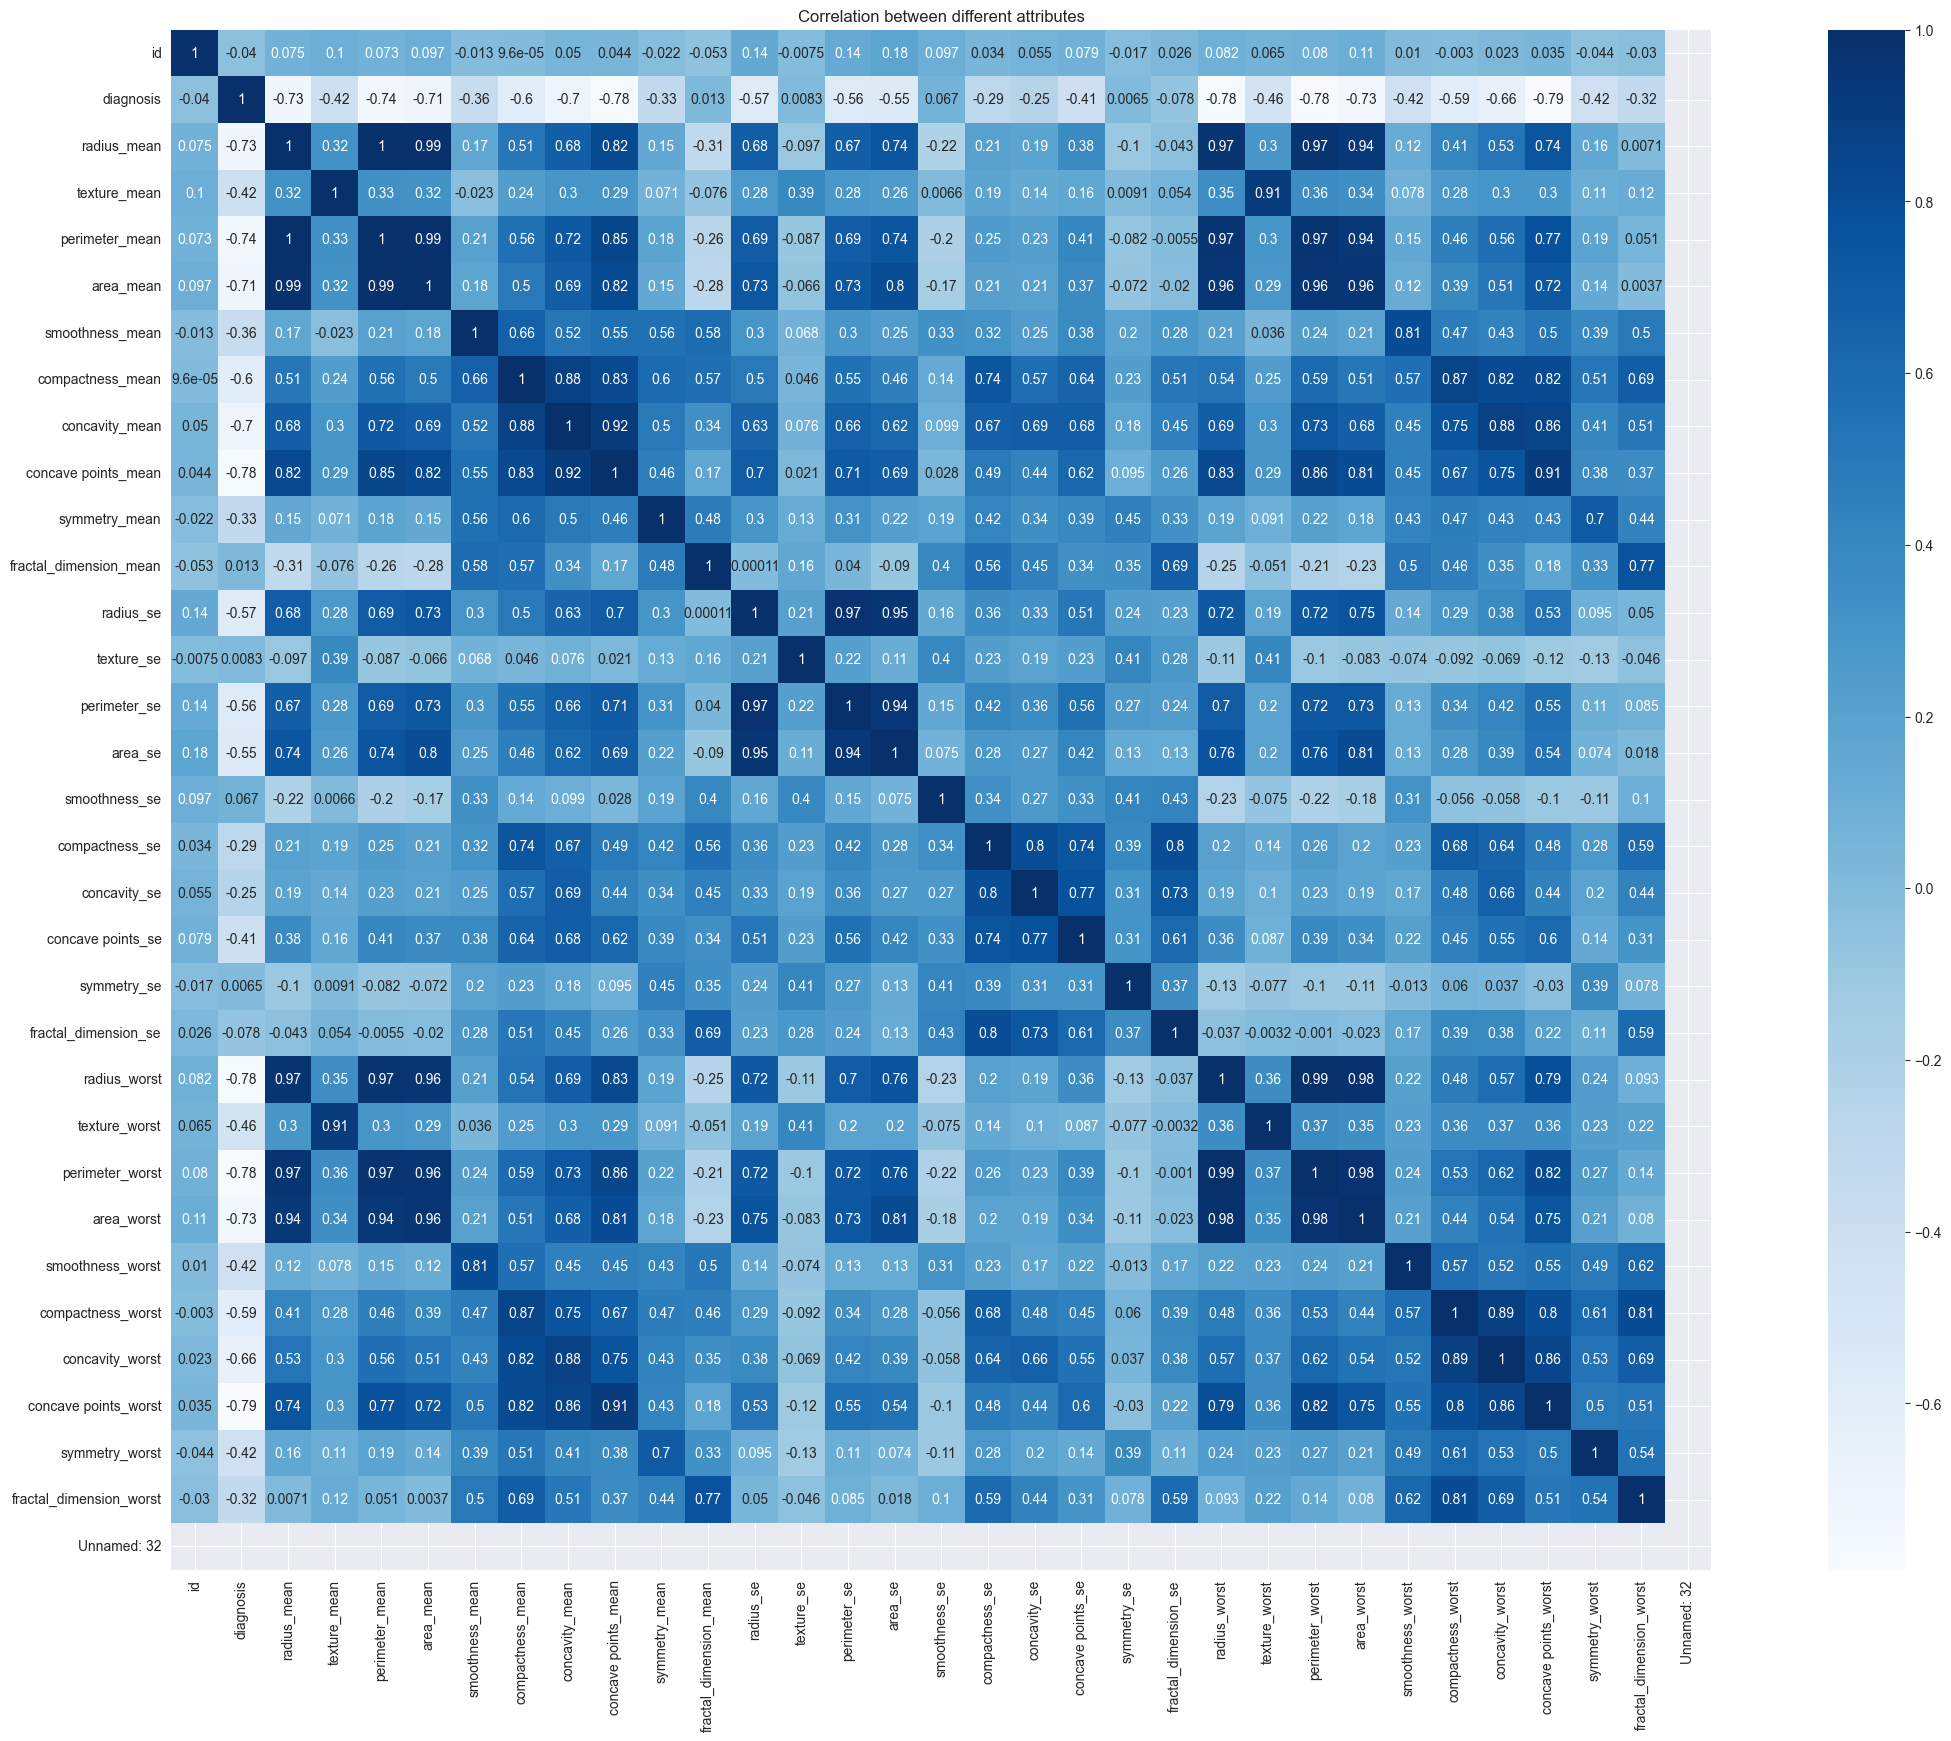

In [153]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

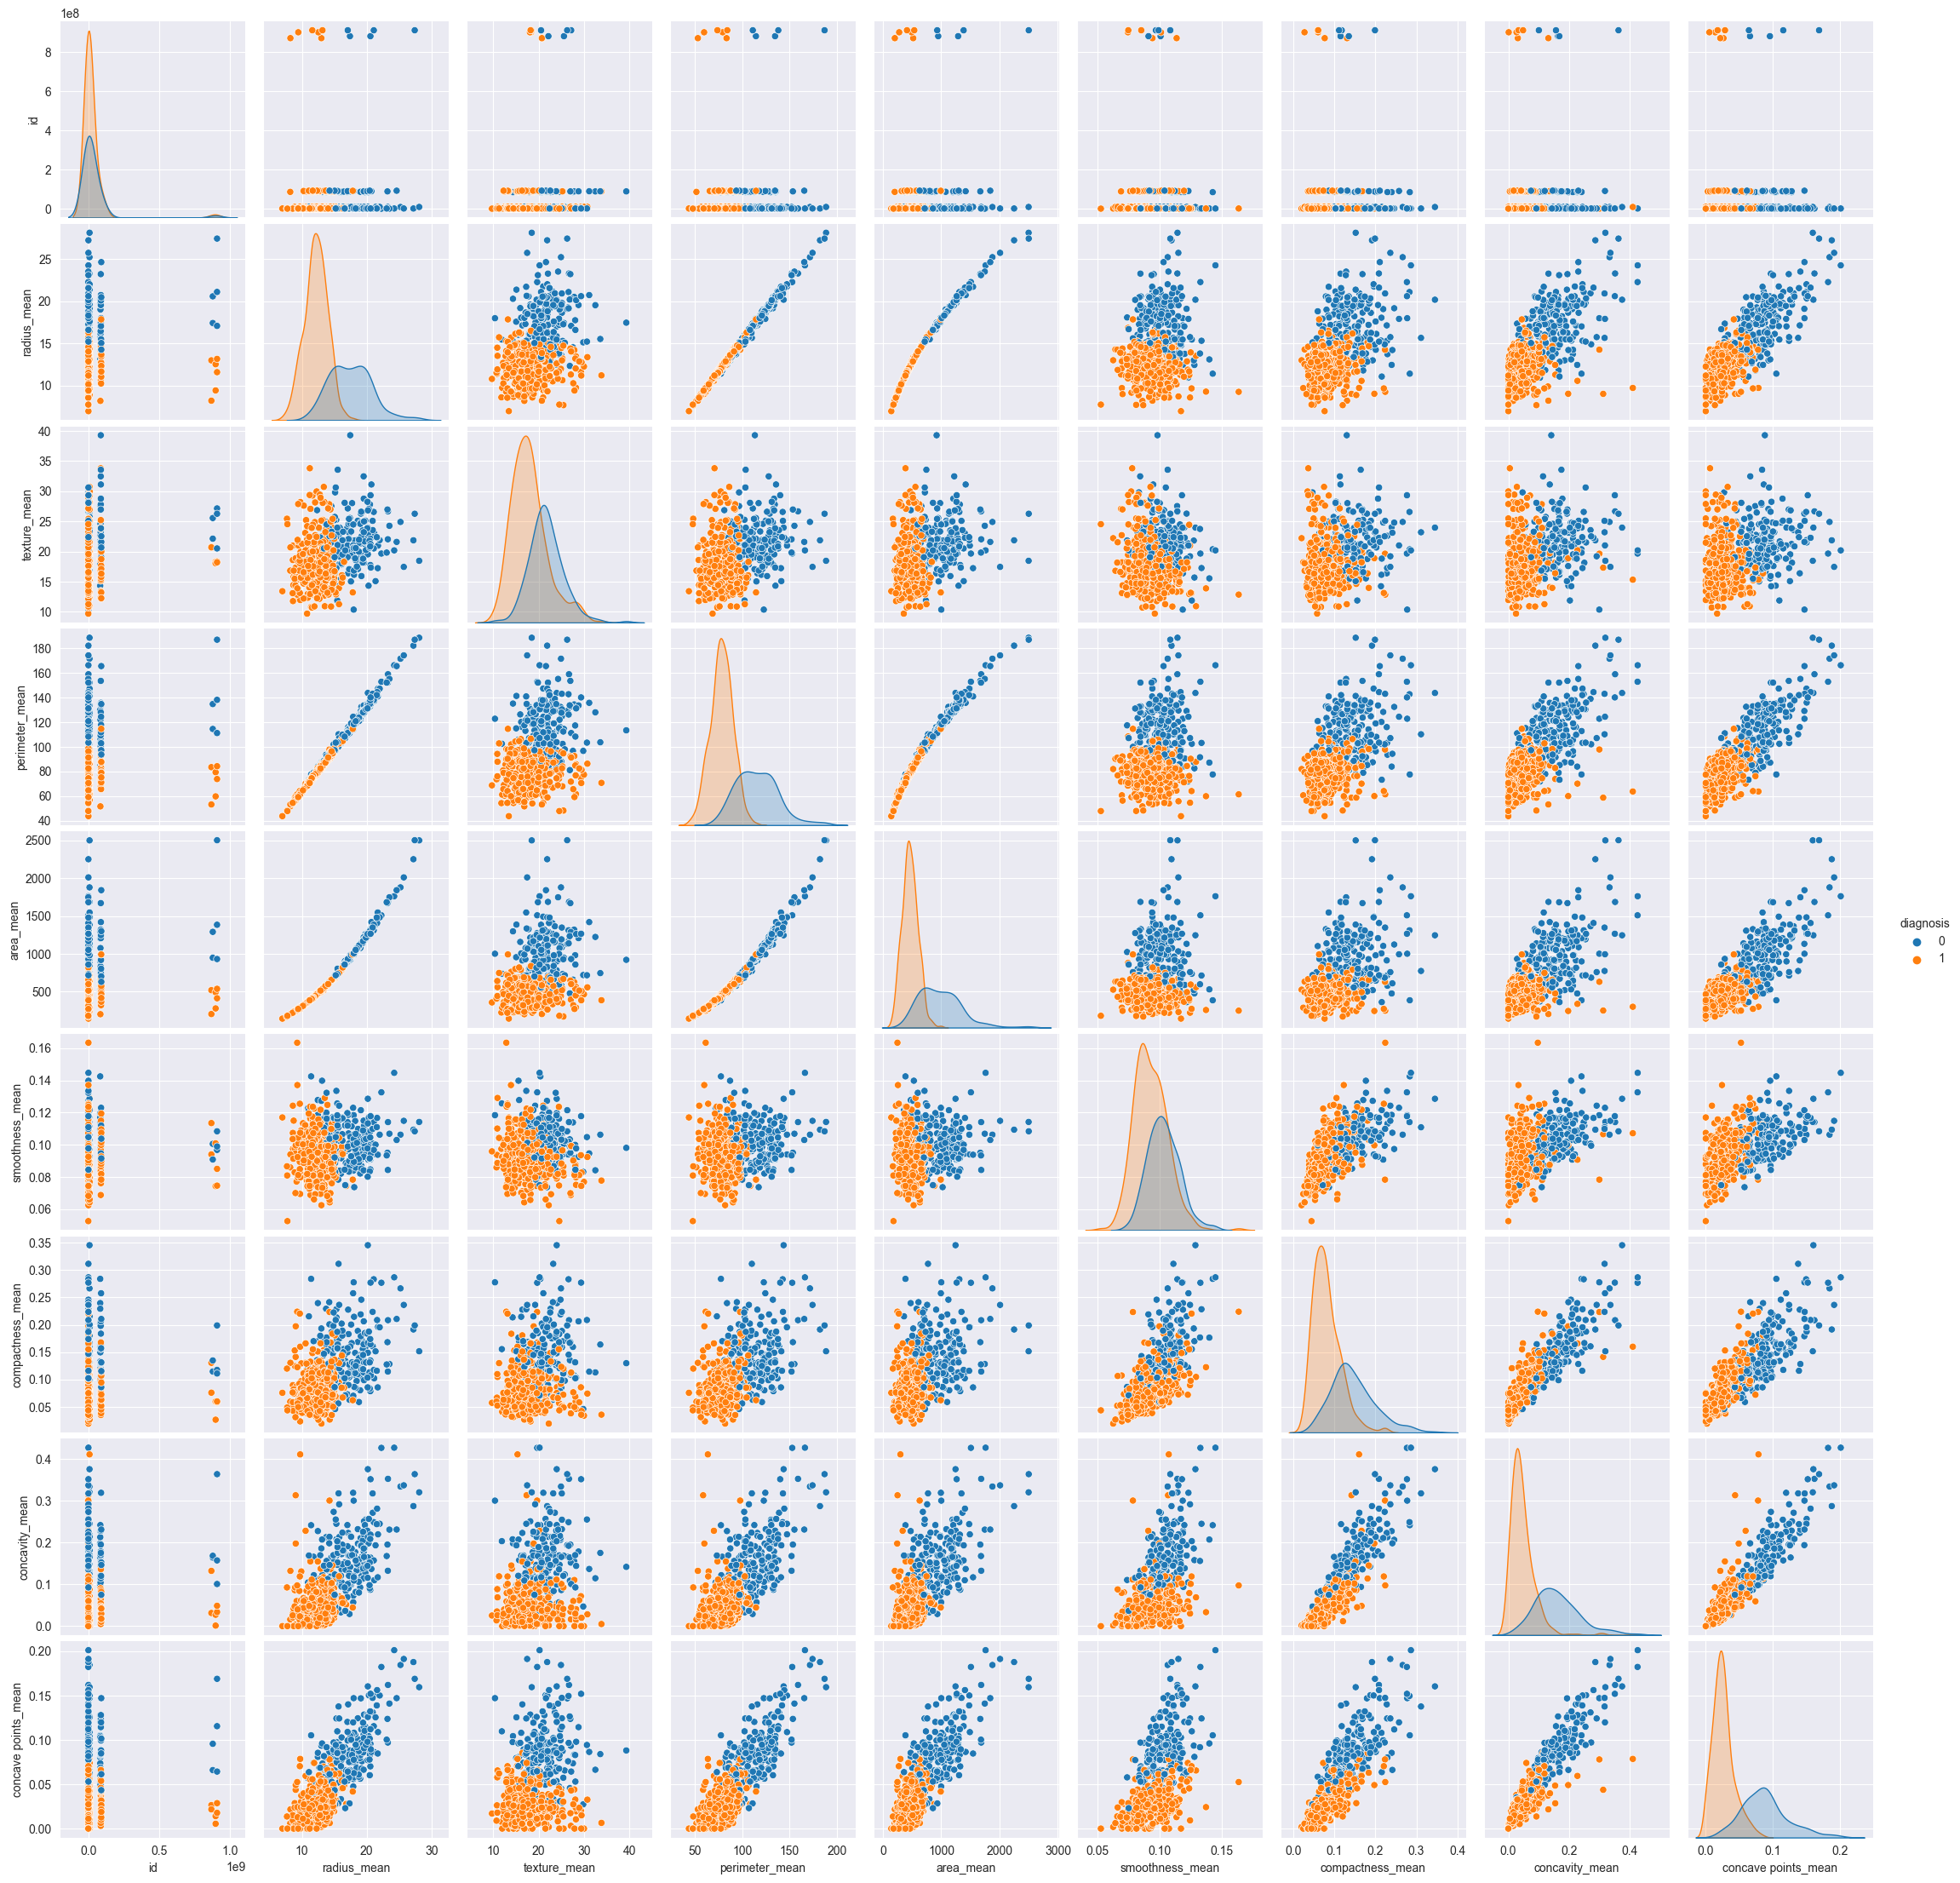

In [154]:
sns.pairplot(df.iloc[:, 0:10], hue='diagnosis', diag_kind='kde')

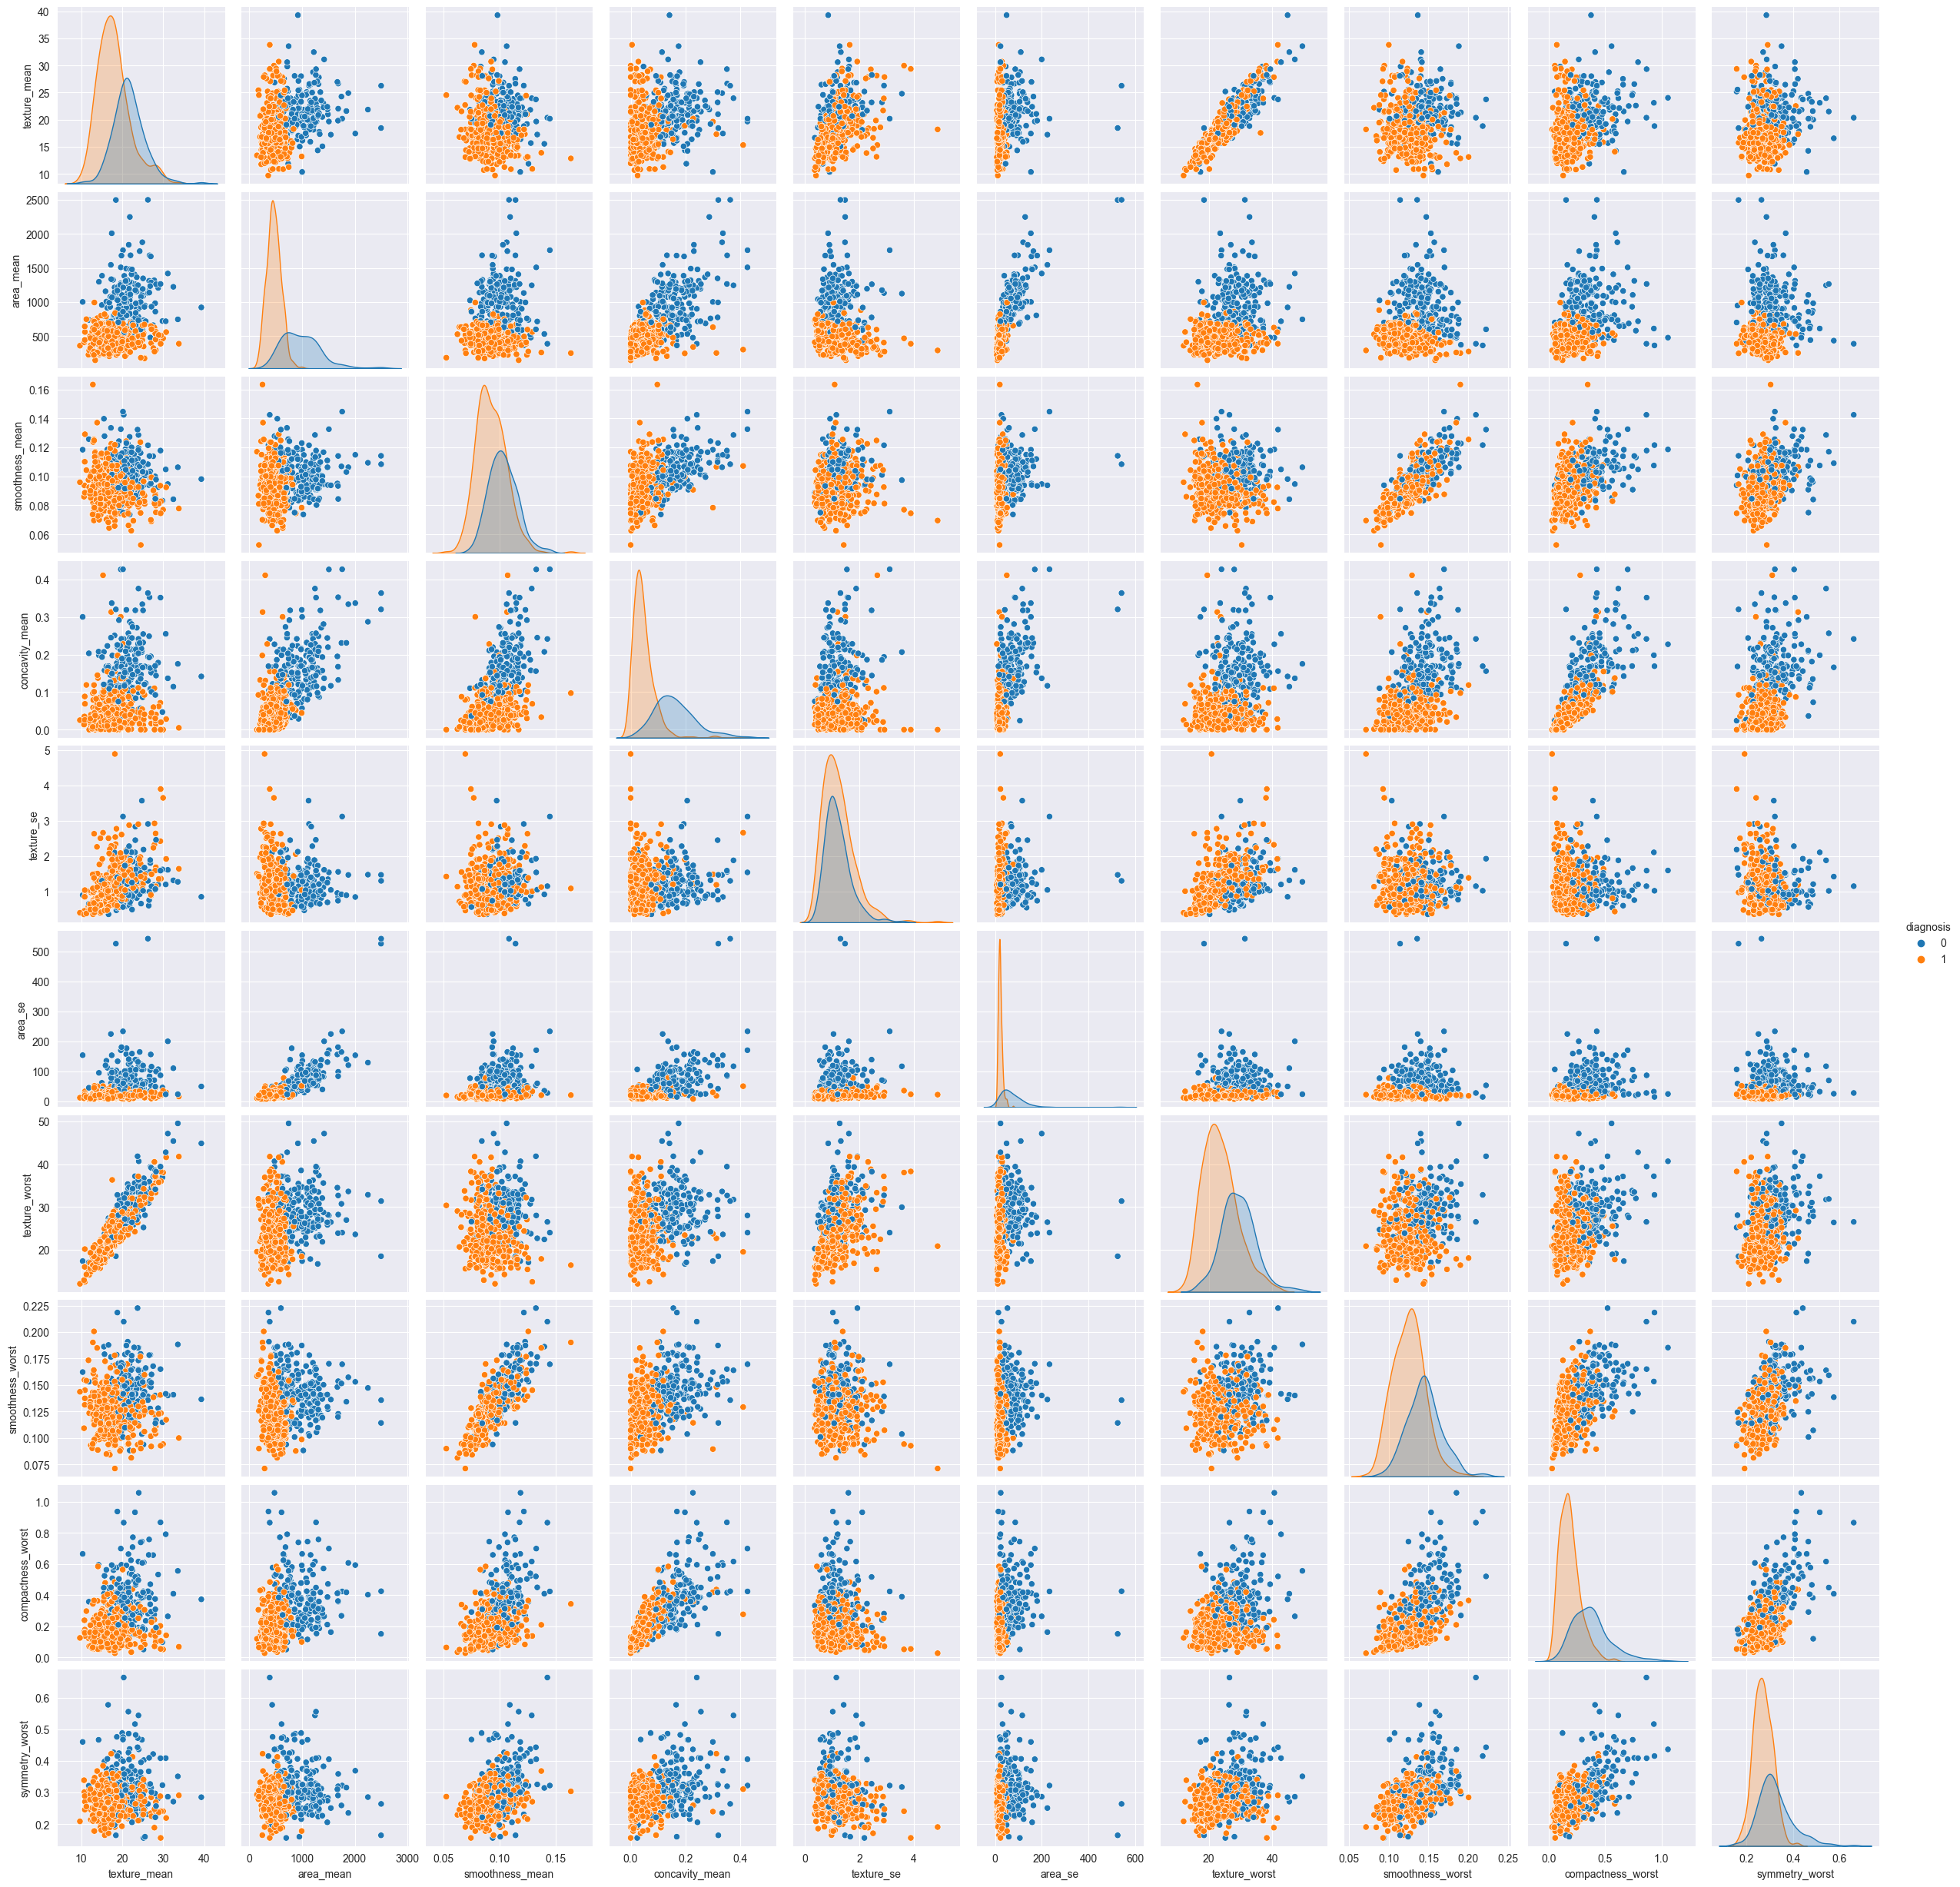

In [155]:
#data visualization
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'texture_mean',
        'area_mean', 
        'smoothness_mean', 
        'concavity_mean', 
        'texture_se', 
        'area_se', 
        'texture_worst', 
        'smoothness_worst',
        'compactness_worst', 
        'symmetry_worst'
        ]

sns.pairplot(data=df[cols], hue='diagnosis', diag_kind='kde')

In [156]:
df[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    int64  
 1   texture_mean       569 non-null    float64
 2   area_mean          569 non-null    float64
 3   smoothness_mean    569 non-null    float64
 4   concavity_mean     569 non-null    float64
 5   texture_se         569 non-null    float64
 6   area_se            569 non-null    float64
 7   texture_worst      569 non-null    float64
 8   smoothness_worst   569 non-null    float64
 9   compactness_worst  569 non-null    float64
 10  symmetry_worst     569 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


### Splitting  Into Tarain and Test

In [157]:
# split the data
X = df[['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'texture_se', 'area_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst']]
y = df["diagnosis"]



In [158]:
#splitting the x and the y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:
# Model building
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear',max_iter=100) 


In [160]:
# training the model on training data
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [161]:

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)
print(X_train_sc)
prediction = model.predict(X_test)


[[-0.43531947 -1.1391179   0.78057331 ...  0.72289445  1.18673232
   2.09724217]
 [ 1.73302577  1.85197292  1.319843   ...  0.76192793  3.26560084
   1.89116053]
 [-1.24962228 -1.10978518 -1.33264483 ... -1.43869328 -0.54856427
   0.59760192]
 ...
 [-0.55500086 -0.06142266 -2.26162674 ... -1.98906544 -1.30700577
  -0.70863864]
 [ 0.10207345 -0.15477966  0.73743174 ...  1.29104853  0.67202023
   0.43432185]
 [ 0.31327591 -0.5518995  -1.12268916 ... -0.83410795 -1.05991814
  -0.3345212 ]]


In [162]:
#accuracy of the training data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print("The accuracy of  the training data:",training_data_accuracy)


The accuracy of  the training data: 0.945054945054945


In [163]:
#the accuracy of the testing data
x_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print("The accuracy of  the testing data:",test_data_accuracy)



The accuracy of  the testing data: 0.9649122807017544


In [164]:
input_data=(14.26,12.1,0.1073,0.2077,0.7096,44.91,19.08,0.139,0.5954,0.4667)
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predicting for one data pointi
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print("breast cancer is malignant")
else:
    print("breast cancer is Benign")


[0]
breast cancer is malignant


c:\Users\ADMIN\Desktop\creation\env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [165]:
y_preds= model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_preds)
print(cm)

[[39  4]
 [ 0 71]]


### Confusion matrix

<Axes: >

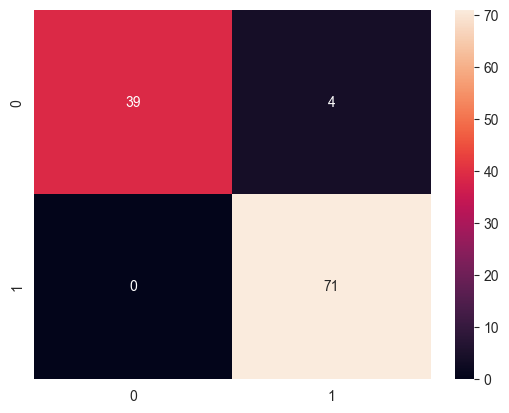

In [166]:
# confusion matrix visualization with seaborn heatmap
sns.heatmap(cm, annot=True)

In [167]:
# y_test contains the true labels of the testing set
# y_pred contains the predicted labels of the testing set
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()


<BarContainer object of 4 artists>

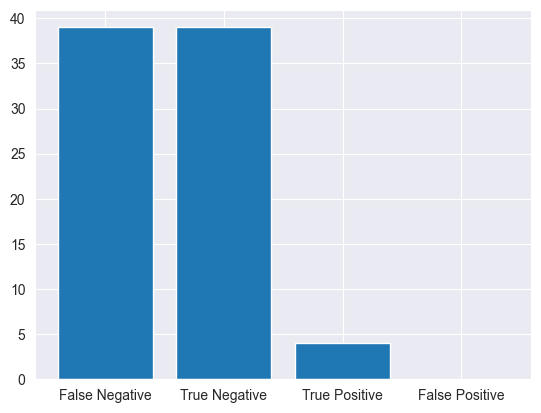

In [197]:
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[tn,tn,fp,fn])

In [168]:
# The number of true positives is given by the tp variable
print('True positives:', tp)


True positives: 71


In [169]:
# y_true is the true labels of the testing set
y_true = y_test

In [170]:
Accuracy = (tp + tn) / (tp + tn + fp + fn)


In [171]:
# y_true and y_pred are the true and predicted labels for the testing set
# where 0 represents benign and 1 represents malignant
y_true_malignant = y_true[y_true == 1]
y_preds_malignant = y_preds[y_true == 1]

y_true_benign = y_true[y_true == 1]
y_preds_benign = y_preds[y_true == 1]


In [172]:
# Calculate TP, TN, FP, FN for malignant class
tp_malignant = sum((y_true_malignant == 1) & (y_preds_malignant == 1))
tn_malignant = sum((y_true_malignant == 0) & (y_preds_malignant == 0))
fp_malignant = sum((y_true_malignant == 0) & (y_preds_malignant == 1))
fn_malignant = sum((y_true_malignant == 1) & (y_preds_malignant == 0))


In [173]:
# Calculate accuracy for malignant class
acc_malignant = (tp_malignant + tn_malignant) / (tp_malignant + tn_malignant + fp_malignant + fn_malignant)


In [174]:
# Calculate TP, TN, FP, FN for benign class
tp_benign = sum((y_true_benign == 0) & (y_preds_benign == 0))
tn_benign = sum((y_true_benign == 1) & (y_preds_benign == 1))
fp_benign = sum((y_true_benign == 1) & (y_preds_benign == 0))
fn_benign = sum((y_true_benign == 0) & (y_preds_benign == 1))


In [175]:
# Calculate accuracy for benign class
acc_benign = (tp_benign + tn_benign) / (tp_benign + tn_benign + fp_benign + fn_benign)

In [176]:
# Print the accuracies
print("Malignant accuracy:", acc_malignant)
print("Benign accuracy:", acc_benign)

Malignant accuracy: 1.0
Benign accuracy: 1.0


In [177]:
# Calculate the accuracy of malignant and benign predictions separately
malignant_idx = (y_test == 1)
benign_idx = (y_test == 0)
malignant_acc = accuracy_score(y_test[malignant_idx], y_preds[malignant_idx])
benign_acc = accuracy_score(y_test[benign_idx], y_preds[benign_idx])

In [178]:
# Print the accuracy of malignant and benign predictions as percentages
print(f'Malignant accuracy: {malignant_acc*100:.2f}%')
print(f'Benign accuracy: {benign_acc*100:.2f}%')

Malignant accuracy: 100.00%
Benign accuracy: 90.70%


### classification report

In [179]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [196]:
# store this model in pickle file uisng clf 
pickle.dump(model, open('model.pkl','wb'))
